In [1]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

# Move to the parent directory
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)

# Print the updated working directory
updated_directory = os.getcwd()
print("Updated Directory:", updated_directory)

Current Directory: /mnt/c/Users/rjmay/code/research_ms/alt_distr
Updated Directory: /mnt/c/Users/rjmay/code/research_ms


In [2]:
! source ../venv/bin/activate

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
import pickle
import time



### Simulation stage

In [4]:
# from modules.multi_bounds_v3 import bounds_class
# from modules.Bhatt_knn_func import knn_num_calc
# from modules.data_gen import data_gen

In [76]:
PICKLED =True

dim_str = "15" # TODO change me 



In [77]:
file_path = 'sim_data/beta_beta' + dim_str +'.pkl' # DONT FORGET TO CHANGE ME IF YOU COPY AND PASTE


    

if PICKLED == True:
    

    # Open the file in binary read mode
    with open(file_path, 'rb') as file:
        # Use pickle.load to deserialize and load the list of objects from the file
        loaded_objects = pickle.load(file)

    print('Loaded object successfully')
    
    [bound_obj_lst, sample_sizes] = loaded_objects

Loaded object successfully


### Using the data



In [78]:
# sample_sizes = np.logspace(2, 3.3011, 9 , endpoint = True, dtype = int)
sample_sizes = np.array(sample_sizes)*2
dpi = 250

In [79]:
lst = [obj() for obj in bound_obj_lst ]

df = pd.DataFrame(lst, index = sample_sizes)

df


/home/rjmay/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rjmay/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,Dp_lower,Dp_upper,Bha_lower,Bha_upper,Bha_knn_lower,Bha_knn_upper,tight_lower,tight_upper,Maha_upper,inf_lower,inf_upper,enDive_lower,enDive_upper
100,0.357294,0.445160,0.089404,0.268784,0.103732,0.297213,0.151888,0.157489,NaN,0.000107,0.007473,0.212473,0.227702
160,0.342266,0.441188,0.067555,0.244936,0.098015,0.291289,0.147926,0.153378,NaN,0.000069,0.006919,0.218947,0.237684
250,0.326592,0.434536,0.055796,0.226434,0.093607,0.286762,0.143734,0.149052,NaN,0.000066,0.007771,0.214975,0.237361
400,0.313171,0.427775,0.052084,0.220465,0.091752,0.284799,0.142879,0.148163,NaN,0.000095,0.009719,0.219411,0.248953
630,0.301764,0.419981,0.048374,0.213490,0.089566,0.282812,0.142054,0.147301,NaN,0.000153,0.012338,0.206587,0.240834
1000,0.294586,0.414854,0.046767,0.210531,0.088850,0.282389,0.142051,0.147302,NaN,0.000239,0.015423,0.135723,0.188211
1600,0.285306,0.407380,0.045444,0.207915,0.088513,0.282177,0.142009,0.147258,NaN,0.000328,0.017686,0.102368,0.152959
2500,0.276398,0.399769,0.044427,0.205806,0.086654,0.279895,0.140243,0.145432,NaN,0.000156,0.010380,0.099974,0.156988
4000,0.267783,0.392000,0.043856,0.204625,0.085682,0.278655,0.139248,0.144404,NaN,0.000023,0.004770,0.078836,0.131038
6300,0.259521,0.384245,0.043761,0.204469,0.154057,0.360872,0.207046,0.214572,NaN,0.000036,0.005997,0.066243,0.114471


In [80]:
for obj in bound_obj_lst:
    print(len(obj))

500
500
500
500
500
500
500
500
500
500
500


In [81]:
dp_l = []
dp_u = []

Bha_u =[]
Bha_l =[]

Bha_knn_u = []
Bha_knn_l = []

inf_l = []
inf_u = []

enDive_l = []
enDive_u = []


for obj in bound_obj_lst:
    a,b = obj.get_bounds_dp()
    dp_l.append(a)
    dp_u.append(b)
    
    a,b = obj.get_bounds_Bha()
    Bha_l.append(a)
    Bha_u.append(b)

    
#     a, b = obj.get_bounds_tight()
#     tight_l.append(a)
#     tight_u.append(b)
    
    a, b= obj.get_bounds_Bha_knn()
    Bha_knn_l.append(a)
    Bha_knn_u.append(b)
    
    a,b = obj.get_inf_bounds()
    inf_l.append(a)
    inf_u.append(b)
    
    a,b = obj.get_Bounds_enDive()
    enDive_l.append(a)
    enDive_u.append(b)
    
    

Calculate true values

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import beta
#### I have to code the true values and theoreticals. 

# Define dx and x range
dx = 0.001
x = np.arange(-10, 10 + dx, dx)

# Define the normal distributions
f0 = beta.pdf(x, a=2, b=5)
f1 = beta.pdf(x, a=5, b=2)

# Calculate the minimum of f0 and f1
min_f0_f1 = np.minimum(f0, f1)
# Calculate BER as 0.5 * sum(min(f0, f1) * dx)
BER = 0.5 * np.nansum(min_f0_f1 * dx)

p = 0.5
q = 0.5
pf0 = p * f0
qf1 = q * f1

# Calculate the function
func = (pf0 - qf1)**2 / (pf0 + qf1)

# Calculate dp using numerical integration (sum and dx)
dp = np.nansum(func) * dx

# Calculate upper and lower bounds
upper = 0.5 - 0.5 * dp
lower = 0.5 - 0.5 * np.sqrt(dp)

theory_Dp = [lower, upper]

func2 = np.sqrt(f0 * f1)
# Calculate BC using numerical integration (sum and dx)
BC = np.nansum(func2) * dx

lower = 0.5 - 0.5 * np.sqrt(1 - BC**2)
upper = 0.5 * BC

theory_bha = [lower, upper]


/tmp/ipykernel_5141/2365303086.py:26: RuntimeWarning: invalid value encountered in divide
  func = (pf0 - qf1)**2 / (pf0 + qf1)


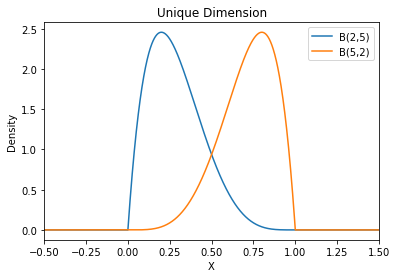

In [83]:
plt.plot(x, f0, label = "B(2,5)")
plt.plot(x, f1, label = "B(5,2)")
plt.title("Unique Dimension")
plt.xlabel("X")
plt.ylabel("Density")
plt.xlim((-.5, 1.5))
plt.legend()
plt.savefig("alt_distr/images/beta_demo.png", facecolor=(1,1,1,1),  bbox_inches='tight')
plt.show()


In [84]:
print(theory_Dp, "\n", theory_bha)

[0.08624246330070995, 0.15760940164907128] 
 [0.05609086943364505, 0.23009711819104303]


In [85]:
BER

0.10937546875016925

True value is     0.1094


In [86]:
### this cell helps to fix bugs from not doing the data in here. 
MC_num = len(bound_obj_lst[0])

BER_lst = np.ones(MC_num) * BER



def mse(l1, l2):## numpy lists
    return ((l1 - l2)**2).mean(axis=0)

In [87]:
# cases = len(sample_sizes)

## theoretical MSE
bha_theoretical_l= np.ones(MC_num) * (theory_bha[0])
bha_theoretical_u= np.ones(MC_num) * (theory_bha[1])


dp_theoretical_l= np.ones(MC_num) * theory_Dp[0]
dp_theoretical_u= np.ones(MC_num) * theory_Dp[1]


In [88]:
def mse_v2(true, matrix):
    temp = matrix - true
    temp = temp **2
    return np.mean(temp, axis= 1)
    

In [89]:
for j in Bha_l:
    print(len(j))

500
500
500
500
500
500
500
500
500
500
500


In [90]:
print(f"theory_Dp[0] shape: {np.shape(theory_Dp[0])}, dp_l shape: {np.shape(dp_l)}")
# print(f"theory_Dp[1] shape: {np.shape(theory_Dp[1])}, dp_u shape: {np.shape(dp_u)}")


theory_Dp[0] shape: (), dp_l shape: (11, 500)


### Plotting

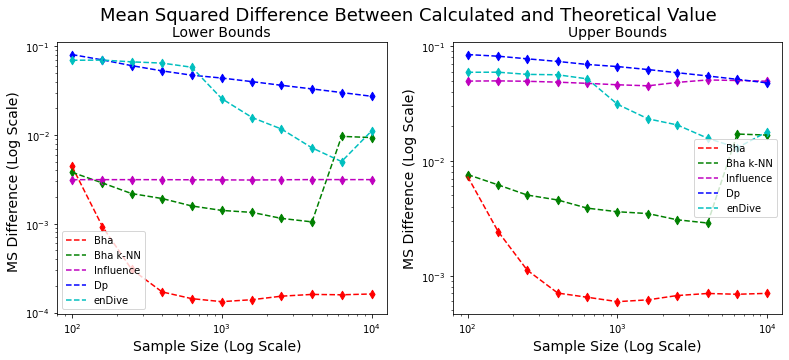

In [91]:
lower_mse_DP =mse_v2(theory_Dp[0], dp_l)
upper_mse_DP = mse_v2(theory_Dp[1], dp_u)

lower_mse_Bha = mse_v2(theory_bha[0], Bha_l)
upper_mse_Bha =mse_v2(theory_bha[1], Bha_u)


lower_mse_Bha_knn = mse_v2(theory_bha[0], Bha_knn_l)
upper_mse_Bha_knn =mse_v2(theory_bha[1], Bha_knn_u)

lower_mse_inf = mse_v2(theory_bha[0], inf_l)
upper_mse_inf = mse_v2(theory_bha[1], inf_u)

lower_mse_enDive = mse_v2(theory_Dp[0], enDive_l)
upper_mse_enDive = mse_v2(theory_Dp[1], enDive_u)




fs =14

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
st = fig.suptitle("Mean Squared Difference Between Calculated and Theoretical Value", fontsize=fs+4)
ax = axes[0]


ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)

ax.plot(sample_sizes, lower_mse_Bha,'r--', label='Bha')
ax.scatter(sample_sizes, lower_mse_Bha, color = 'red', marker = 'd')

ax.plot(sample_sizes, lower_mse_Bha_knn, color = 'green',linestyle="--",  label = "Bha k-NN")
ax.scatter(sample_sizes, lower_mse_Bha_knn, color = 'g', marker = 'd')

ax.plot(sample_sizes, lower_mse_inf,  'm--', label='Influence')
ax.scatter(sample_sizes, lower_mse_inf,  color='m', marker='d')

ax.plot(sample_sizes, lower_mse_DP,  'b--', label='Dp')
ax.scatter(sample_sizes, lower_mse_DP,  color='b', marker='d')


ax.plot(sample_sizes, lower_mse_enDive,  'c--', label='enDive')
ax.scatter(sample_sizes, lower_mse_enDive,  color='c', marker='d')

ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("MS Difference (Log Scale) ", fontsize=fs)
ax.set_title("Lower Bounds", fontsize = fs)



ax.legend()

ax = axes[1]

ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)

ax.plot(sample_sizes, upper_mse_Bha,'r--', label='Bha')
ax.scatter(sample_sizes, upper_mse_Bha, color = 'red', marker = 'd')


ax.plot(sample_sizes, upper_mse_Bha_knn, color = 'g',  linestyle  = "--", label = "Bha k-NN")
ax.scatter(sample_sizes, upper_mse_Bha_knn, color = 'g', marker = 'd')

ax.plot(sample_sizes, upper_mse_inf,  'm--', label='Influence')
ax.scatter(sample_sizes, upper_mse_inf,  color='m', marker='d')


ax.plot(sample_sizes, upper_mse_DP,  'b--', label='Dp')
ax.scatter(sample_sizes, upper_mse_DP,  color='b', marker='d')


ax.plot(sample_sizes, upper_mse_enDive,  'c--', label='enDive')
ax.scatter(sample_sizes, upper_mse_enDive,  color='c', marker='d')

ax.set_xlabel("Sample Size (Log Scale)", fontsize = fs)
ax.set_ylabel("MS Difference (Log Scale)", fontsize=fs)
ax.set_title("Upper Bounds", fontsize = fs)

ax.legend()

file_name = r"alt_distr/images/beta_beta_MSE" + dim_str + ".png"
# plt.savefig(file_name,facecolor=(1,1,1,1),  bbox_inches='tight', dpi= dpi)
plt.show()

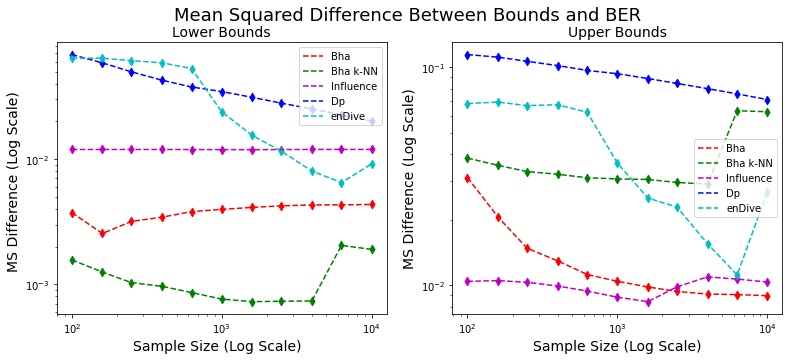

In [92]:
lower_mse_DP_BER =mse_v2(BER, dp_l)
upper_mse_DP_BER = mse_v2(BER, dp_u)

lower_mse_Bha_BER = mse_v2(BER, Bha_l)
upper_mse_Bha_BER =mse_v2(BER, Bha_u)


lower_mse_Bha_knn_BER = mse_v2(BER, Bha_knn_l)
upper_mse_Bha_knn_BER =mse_v2(BER, Bha_knn_u)

lower_mse_inf_BER = mse_v2(BER, inf_l)
upper_mse_inf_BER = mse_v2(BER, inf_u)

lower_mse_enDive_BER = mse_v2(BER, enDive_l)
upper_mse_enDive_BER = mse_v2(BER, enDive_u)

fs =14

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
st = fig.suptitle("Mean Squared Difference Between Bounds and BER", fontsize=fs+4)
ax = axes[0]


ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)

ax.plot(sample_sizes, lower_mse_Bha_BER,'r--', label='Bha')
ax.scatter(sample_sizes, lower_mse_Bha_BER, color = 'red', marker = 'd')

ax.plot(sample_sizes, lower_mse_Bha_knn_BER, color = 'green',linestyle="--",  label = "Bha k-NN")
ax.scatter(sample_sizes, lower_mse_Bha_knn_BER, color = 'g', marker = 'd')

ax.plot(sample_sizes, lower_mse_inf_BER,  'm--', label='Influence')
ax.scatter(sample_sizes, lower_mse_inf_BER,  color='m', marker='d')

ax.plot(sample_sizes, lower_mse_DP_BER,  'b--', label='Dp')
ax.scatter(sample_sizes, lower_mse_DP_BER,  color='b', marker='d')


ax.plot(sample_sizes, lower_mse_enDive_BER,  'c--', label='enDive')
ax.scatter(sample_sizes, lower_mse_enDive_BER,  color='c', marker='d')

ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("MS Difference (Log Scale) ", fontsize=fs)
ax.set_title("Lower Bounds", fontsize = fs)


ax.legend()

ax = axes[1]

ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)

ax.plot(sample_sizes, upper_mse_Bha_BER,'r--', label='Bha')
ax.scatter(sample_sizes, upper_mse_Bha_BER, color = 'red', marker = 'd')


ax.plot(sample_sizes, upper_mse_Bha_knn_BER, color = 'g',  linestyle  = "--", label = "Bha k-NN")
ax.scatter(sample_sizes, upper_mse_Bha_knn_BER, color = 'g', marker = 'd')

ax.plot(sample_sizes, upper_mse_inf_BER,  'm--', label='Influence')
ax.scatter(sample_sizes, upper_mse_inf_BER,  color='m', marker='d')


ax.plot(sample_sizes, upper_mse_DP_BER,  'b--', label='Dp')
ax.scatter(sample_sizes, upper_mse_DP_BER,  color='b', marker='d')


ax.plot(sample_sizes, upper_mse_enDive_BER,  'c--', label='enDive')
ax.scatter(sample_sizes, upper_mse_enDive_BER,  color='c', marker='d')

ax.set_xlabel("Sample Size (Log Scale)", fontsize = fs)
ax.set_ylabel("MS Difference (Log Scale)", fontsize=fs)
ax.set_title("Upper Bounds", fontsize = fs )

ax.legend()

file_name = r"alt_distr/images/beta_beta_MSE2"+ dim_str+ ".png"
# plt.savefig(file_name,facecolor=(1,1,1,1),  bbox_inches='tight', dpi= dpi)
plt.show()

Bhattacharyya, Bha Knn, influence same theoretically

Dp, enDive

In [93]:
BER

0.10937546875016925

In [94]:
lst = [obj.validity(BER) for obj in bound_obj_lst ]

df_valid = pd.DataFrame(lst, index = sample_sizes)

df_valid


,Dp_lower,Dp_upper,Bha_lower,Bha_upper,Bha_knn_lower,Bha_knn_upper,tight_lower,tight_upper,inf_lower,inf_upper,enDive_lower,enDive_upper,Dp,Bha,Bha_knn,tight,inf,enDive
100,0.0,1.0,0.708,0.986,0.544,0.998,0.182,0.828,1.0,0.0,0.522,0.508,0.0,0.694,0.542,0.010,0.0,0.030
160,0.0,1.0,0.920,1.000,0.638,0.994,0.146,0.870,1.0,0.0,0.488,0.546,0.0,0.920,0.632,0.016,0.0,0.034
250,0.0,1.0,0.994,1.000,0.688,0.998,0.148,0.866,1.0,0.0,0.496,0.566,0.0,0.994,0.686,0.014,0.0,0.062
400,0.0,1.0,1.000,1.000,0.778,0.996,0.088,0.924,1.0,0.0,0.452,0.602,0.0,1.000,0.774,0.012,0.0,0.054
630,0.0,1.0,1.000,1.000,0.828,1.000,0.074,0.942,1.0,0.0,0.458,0.608,0.0,1.000,0.828,0.016,0.0,0.066
1000,0.0,1.0,1.000,1.000,0.892,0.998,0.056,0.958,1.0,0.0,0.546,0.582,0.0,1.000,0.890,0.014,0.0,0.128
1600,0.0,1.0,1.000,1.000,0.914,1.000,0.042,0.970,1.0,0.0,0.662,0.524,0.0,1.000,0.914,0.012,0.0,0.186
2500,0.0,1.0,1.000,1.000,0.976,1.000,0.044,0.968,1.0,0.0,0.632,0.548,0.0,1.000,0.976,0.012,0.0,0.180
4000,0.0,1.0,1.000,1.000,0.992,0.996,0.030,0.976,1.0,0.0,0.710,0.480,0.0,1.000,0.988,0.006,0.0,0.190
6300,0.0,1.0,1.000,1.000,0.002,1.000,0.000,1.000,1.0,0.0,0.770,0.454,0.0,1.000,0.002,0.000,0.0,0.224


In [95]:
def add_noise_to_df(df, noise_level=0.01):
    """
    Add random noise to each column in a DataFrame.
    
    Parameters:
    - df: pandas DataFrame containing the data to which noise will be added.
    
    Returns:
    - pandas DataFrame with noise added to each column.
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df_noisy = df.copy()
    
    # Iterate through each column in the DataFrame
    for col in df.columns:
        # Calculate the range of the data in the column
#         data_range = df[col].max() - df[col].min()
        
        # Generate random noise from a normal distribution
#         noise = np.random.normal(0, noise_level * data_range, len(df[col]))
        noise = np.random.normal(0, noise_level )
#         noise = np.random.uniform(-1 * noise_level, noise_level)
        # Add the noise to the data in the column
        df_noisy[col] = df[col] + noise
    
    return df_noisy


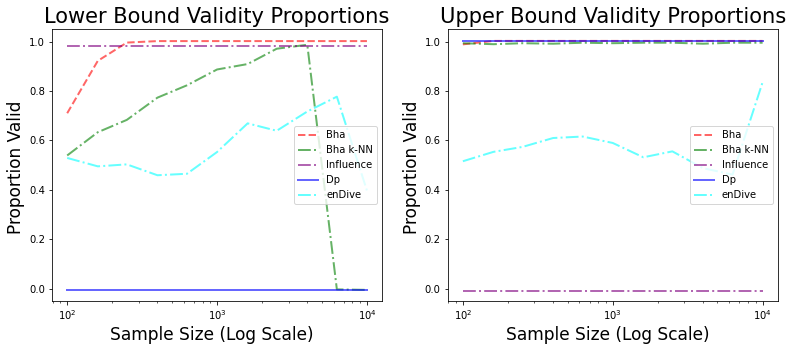

In [96]:
df_noise = add_noise_to_df(df_valid, .008)

fs =17
overlapping = 0.6
lw = 2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

ax = axes[0]

ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)


ax.plot(df_noise["Bha_lower"],'r--', label='Bha', alpha = overlapping, linewidth=lw )

ax.plot(df_noise["Bha_knn_lower"],'g-.', label='Bha k-NN', alpha = overlapping, linewidth = lw)

ax.plot(df_noise["inf_lower"],'purple',ls = "-.", label='Influence', alpha = overlapping, linewidth = lw)

ax.plot(df_noise["Dp_lower"], 'b-',  label='Dp', alpha = overlapping, linewidth = lw)

ax.plot(df_noise["enDive_lower"],'cyan',ls = "-.", label='enDive', alpha = overlapping, linewidth = lw)


# ax.plot(df_valid["tight_lower"],'orange', label='Tight  ')


# ax.plot(sample_sizes, validity_tight_u/ MC_num,  label='Upper Tight Validity ')
# ax.set_xticks(sample_sizes)
ax.set_ylim(-0.05,1.05)
ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("Proportion Valid ", fontsize=fs)
ax.set_title("Lower Bound Validity Proportions" , fontsize = fs +4)
ax.legend()


ax = axes[1]

ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)

ax.plot(df_noise["Bha_upper"],'r--', label='Bha', alpha = overlapping, linewidth = lw)

ax.plot(df_noise["Bha_knn_upper"],'g-.', label='Bha k-NN', alpha = overlapping, linewidth = lw)

ax.plot(df_noise["inf_upper"],'purple',ls = "-.", label='Influence', alpha = overlapping, linewidth =lw)

ax.plot(df_noise["Dp_upper"], 'b-',  label='Dp', alpha = overlapping, linewidth = lw)

ax.plot(df_noise["enDive_upper"],'cyan',ls = "-.", label='enDive', alpha = overlapping, linewidth = lw)


# ax.set_xticks(sample_sizes)
ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("Proportion Valid ", fontsize=fs)
ax.set_ylim(-0.05,1.05)
ax.set_title("Upper Bound Validity Proportions" , fontsize = fs +4)
ax.legend()

# plt.subplots_adjust(left=0.05, right=0.96, bottom=0.1, top=0.90)


file_name = r"alt_distr/images/beta_beta_validity" + dim_str+ ".png"
# plt.savefig(file_name,facecolor=(1,1,1,1),  bbox_inches='tight', dpi= dpi)
plt.show()



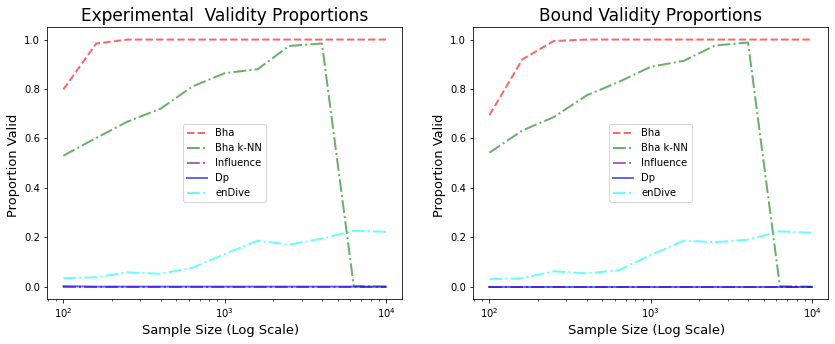

In [97]:
fs =13

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
ax = axes[1]
ax1 = ax

ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)


ax.plot(df_valid["Bha"],'r--', label='Bha', alpha = overlapping, linewidth=lw )
ax.plot(df_valid["Bha_knn"],'g-.', label='Bha k-NN', alpha = overlapping, linewidth = lw)
ax.plot(df_valid["inf"],'purple',ls = "-.", label='Influence', alpha = overlapping, linewidth = lw)
ax.plot(df_valid["Dp"], 'b-',  label='Dp', alpha = overlapping, linewidth = lw)
ax.plot(df_valid["enDive"],'cyan',ls = "-.", label='enDive', alpha = overlapping, linewidth = lw)

# ax.set_xticks(sample_sizes)
ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("Proportion Valid ", fontsize=fs)
ax.set_ylim(-0.05,1.05)
ax.set_title("Bound Validity Proportions" , fontsize = fs +4)
ax.legend()


lst = [obj.experimental_validity() for obj in bound_obj_lst ]
df_valid2 = pd.DataFrame(lst, index = sample_sizes)

ax = axes[0]

# df_noise2 = add_noise_to_df(df_valid2, .008)


ax = axes[0]
ax1 = ax

ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)


ax.plot(df_valid2["Bha"],'r--', label='Bha', alpha = overlapping, linewidth=lw )
ax.plot(df_valid2["Bha_knn"],'g-.', label='Bha k-NN', alpha = overlapping, linewidth = lw)
ax.plot(df_valid2["inf"],'purple',ls = "-.", label='Influence', alpha = overlapping, linewidth = lw)
ax.plot(df_valid2["Dp"], 'b-',  label='Dp', alpha = overlapping, linewidth = lw)
ax.plot(df_valid2["enDive"],'cyan',ls = "-.", label='enDive', alpha = overlapping, linewidth = lw)

# ax.set_xticks(sample_sizes)
ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("Proportion Valid ", fontsize=fs)
ax.set_ylim(-0.05,1.05)
ax.set_title("Experimental  Validity Proportions" , fontsize = fs +4)
ax.legend()

plt.show()


### Master Figure

In [98]:
lst = [obj.bound_width() for obj in bound_obj_lst ]

bound_width_df = pd.DataFrame(lst, index = sample_sizes)

bound_width_df.head()

,Dp,Bha,Bha_knn,tight,inf,enDive
100,0.087866,0.179380,0.193481,0.005600,0.007366,0.015229
160,0.098922,0.177380,0.193274,0.005451,0.006850,0.018737
250,0.107944,0.170638,0.193156,0.005318,0.007705,0.022386
400,0.114604,0.168380,0.193047,0.005284,0.009624,0.029542
630,0.118217,0.165116,0.193245,0.005247,0.012185,0.034247


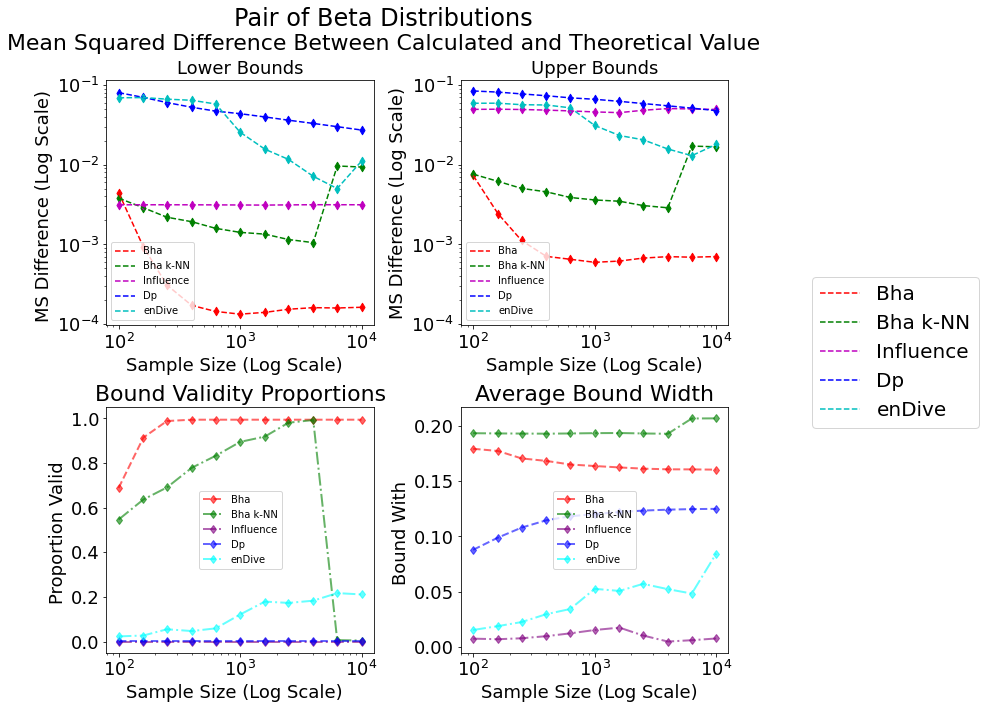

In [99]:
fs =18

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
st = fig.suptitle("Pair of Beta Distributions", fontsize=fs+6)

fig.text(0.5, 0.92, "Mean Squared Difference Between Calculated and Theoretical Value", ha='center', fontsize=fs+4 )

# Manually share y-axis between axes[0][0] and axes[0][1]
axes[0][1].get_shared_y_axes().join(axes[0][0], axes[0][1])


ax = axes[0][0]


ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)

ax.plot(sample_sizes, lower_mse_Bha,'r--', label='Bha')
ax.scatter(sample_sizes, lower_mse_Bha, color = 'red', marker = 'd')

ax.plot(sample_sizes, lower_mse_Bha_knn, color = 'green',linestyle="--",  label = "Bha k-NN")
ax.scatter(sample_sizes, lower_mse_Bha_knn, color = 'g', marker = 'd')

ax.plot(sample_sizes, lower_mse_inf,  'm--', label='Influence')
ax.scatter(sample_sizes, lower_mse_inf,  color='m', marker='d')

ax.plot(sample_sizes, lower_mse_DP,  'b--', label='Dp')
ax.scatter(sample_sizes, lower_mse_DP,  color='b', marker='d')


ax.plot(sample_sizes, lower_mse_enDive,  'c--', label='enDive')
ax.scatter(sample_sizes, lower_mse_enDive,  color='c', marker='d')

ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("MS Difference (Log Scale) ", fontsize=fs)
ax.set_title("Lower Bounds", fontsize = fs)


ax.legend()

ax = axes[0][1]

ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)

ax.plot(sample_sizes, upper_mse_Bha,'r--', label='Bha')
ax.scatter(sample_sizes, upper_mse_Bha, color = 'red', marker = 'd')


ax.plot(sample_sizes, upper_mse_Bha_knn, color = 'g',  linestyle  = "--", label = "Bha k-NN")
ax.scatter(sample_sizes, upper_mse_Bha_knn, color = 'g', marker = 'd')

ax.plot(sample_sizes, upper_mse_inf,  'm--', label='Influence')
ax.scatter(sample_sizes, upper_mse_inf,  color='m', marker='d')


ax.plot(sample_sizes, upper_mse_DP,  'b--', label='Dp')
ax.scatter(sample_sizes, upper_mse_DP,  color='b', marker='d')


ax.plot(sample_sizes, upper_mse_enDive,  'c--', label='enDive')
ax.scatter(sample_sizes, upper_mse_enDive,  color='c', marker='d')

ax.set_xlabel("Sample Size (Log Scale)", fontsize = fs)
ax.set_ylabel("MS Difference (Log Scale)", fontsize=fs)
ax.set_title("Upper Bounds", fontsize = fs)
ax.legend()


ax = axes[1][0]
ax1 = ax

ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)


ax.plot(df_noise["Bha"], 'r--d', label='Bha', alpha=overlapping, linewidth=lw)
ax.plot(df_noise["Bha_knn"], 'g-.d', label='Bha k-NN', alpha=overlapping, linewidth=lw)
ax.plot(df_noise["inf"], color='purple', linestyle='-.', marker='d', label='Influence', alpha=overlapping, linewidth=lw)
ax.plot(df_noise["Dp"], 'b--d', label='Dp', alpha=overlapping, linewidth=lw)
ax.plot(df_noise["enDive"], color = 'cyan', linestyle='-.', marker ='d', label='enDive', alpha=overlapping, linewidth=lw)

# ax.plot(df_noise["tight"],color = 'gold',ls = "-.", marker = 'd',label='tight', alpha = overlapping, linewidth = lw)


# ax.set_xticks(sample_sizes)
ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("Proportion Valid ", fontsize=fs)
ax.set_ylim(-0.05,1.05)
ax.set_title("Bound Validity Proportions" , fontsize = fs +4)
ax.legend()


ax = axes[1][1]

ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)


ax.plot(bound_width_df["Bha"],'r--d', label='Bha', alpha = overlapping, linewidth=lw )
ax.plot(bound_width_df["Bha_knn"],'g-.d', label='Bha k-NN', alpha = overlapping, linewidth = lw)
ax.plot(bound_width_df["inf"],color = 'purple',ls = "-.", marker= 'd', label='Influence', alpha = overlapping, linewidth = lw)
ax.plot(bound_width_df["Dp"], 'b--d',  label='Dp', alpha = overlapping, linewidth = lw)
ax.plot(bound_width_df["enDive"],color = 'cyan',ls = "-.", marker = 'd',label='enDive', alpha = overlapping, linewidth = lw)

# ax.plot(bound_width_df["tight"],color = 'gold',ls = "-.", marker = 'd',label='tight', alpha = overlapping, linewidth = lw)



# ax.set_xticks(sample_sizes)
ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("Bound With ", fontsize=fs)
# ax.set_ylim(0.0, 0.3)
ax.set_title("Average Bound Width" , fontsize = fs +4)
ax.legend()


 #Get unique handles and labels from any subplot
handles, labels = axes[0][0].get_legend_handles_labels()

# Create a single legend below the entire figure
# fig.legend(handles, labels, loc='lower center', ncol=5, fontsize=fs+2, bbox_to_anchor=(0.5, -0.06))
fig.legend(handles, labels, loc='right', ncol=1, fontsize=fs+2, bbox_to_anchor=(1.34, 0.5) )

# plt.rcParams.update({'font.size': 18})


for ax in axes.flat:
    ax.tick_params(axis='both', which='major', labelsize=18)  # For major ticks

fig.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space for the common title


file_name = r"alt_distr/images/master/beta_beta_master" + dim_str +  ".png"
plt.savefig(file_name,facecolor=(1,1,1,1),  bbox_inches='tight', dpi= dpi)



file_name = r"alt_distr/images/dpi/beta_beta_master" + dim_str +  ".png"
plt.savefig(file_name,facecolor=(1,1,1,1),  bbox_inches='tight', dpi= 600)
plt.show()